# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [2]:
df = pd.read_csv('nhanes_2015_2016.csv')
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

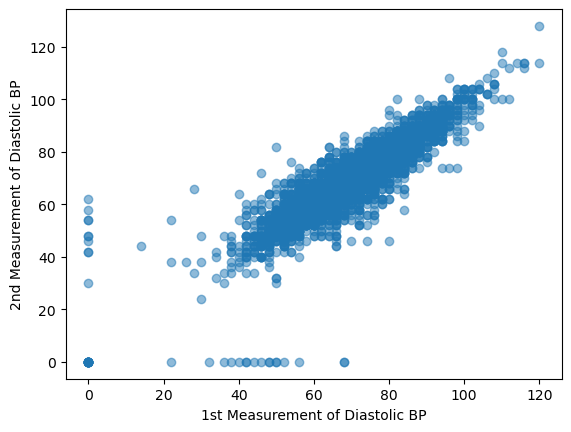

In [3]:
# enter your code here
plt.scatter(data=df, x='BPXDI1', y='BPXDI2', alpha=0.5)
plt.xlabel('1st Measurement of Diastolic BP')
plt.ylabel('2nd Measurement of Diastolic BP');

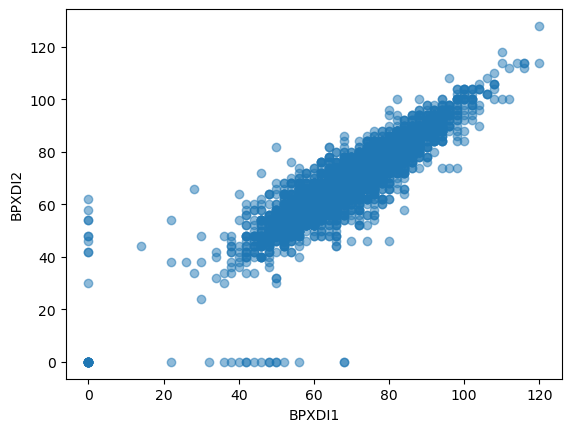

In [4]:
sns.regplot(data=df, x='BPXDI1', y='BPXDI2',
            fit_reg=False, scatter_kws={"alpha":0.5});

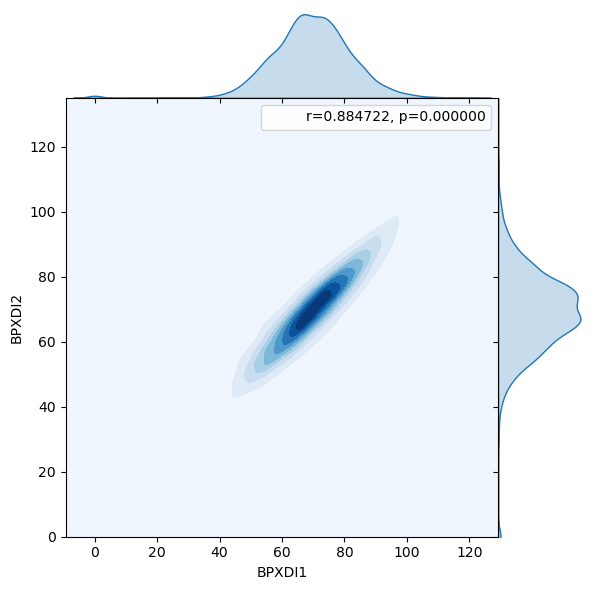

In [29]:
# remove records with NaN
plotData = df[['BPXDI1', 'BPXDI2']].dropna().copy()

g = sns.jointplot(data=plotData, x='BPXDI1', y='BPXDI2', kind='kde', space=0, 
                  fill=True, thresh=0, cmap='Blues')
plt.ylim(0,135)

# call the scipy function for pearson correlation
r, p = stats.pearsonr(x=plotData.BPXDI1, y=plotData.BPXDI2)
# if you choose to write your own legend, then you should adjust the properties then
phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.show()

In [26]:
df[['BPXSY1', 'BPXSY2', 'BPXDI1', 'BPXDI2']].corr()

,BPXSY1,BPXSY2,BPXDI1,BPXDI2
BPXSY1,1.000000,0.962287,0.316531,0.277681
BPXSY2,0.962287,1.000000,0.329843,0.303847
BPXDI1,0.316531,0.329843,1.000000,0.884722
BPXDI2,0.277681,0.303847,0.884722,1.000000


__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

*<span style="color:red">
There is a weak positive correlation between the repeated measurements of diastolic blood pressure and that of systolic blood pressure ranging from 0.28 to 0.33.
<span>*

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

*<span style="color:red">
The second measurements for the systolic and diastolic blood pressure are less correlated than the first measurements.
<span>*

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

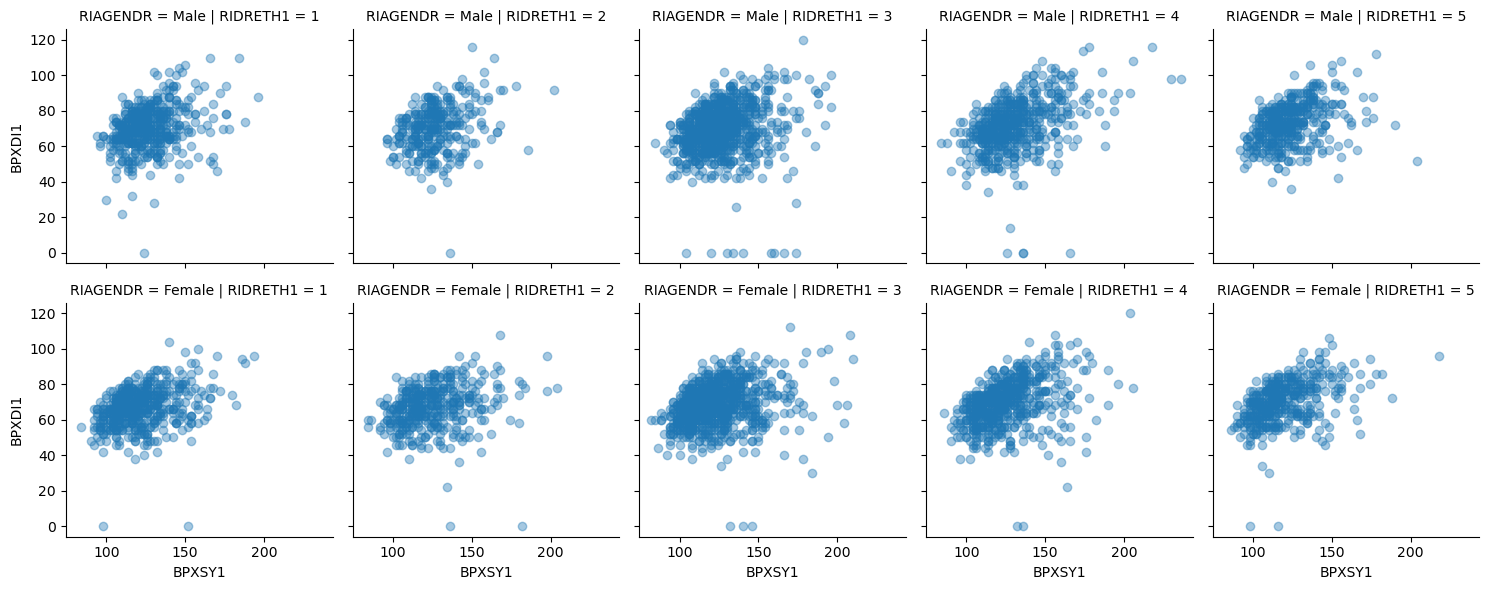

In [30]:
# constructing a boolean value for age and gender
df['RIAGENDR'] = df['RIAGENDR'].map({1:"Male", 2:"Female"})

g = sns.FacetGrid(df, row='RIAGENDR', col='RIDRETH1')
g.map(plt.scatter, 'BPXSY1', 'BPXDI1', alpha=0.4)
g.add_legend()

plt.show()

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

*<span style="color:red">
We can see that there is a low positive correlation between the two blood pressure variables and this relationship is roughly similar among all ethnic groups and gender.
<span>*

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

In [31]:
# adding a more explanative labels to the different categories for the
# educational level and marital status level.

df["DMDEDUC2x"] = df.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
df["DMDMARTLx"] = df.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                       6: "Living w/partner", 77: "Refused"})

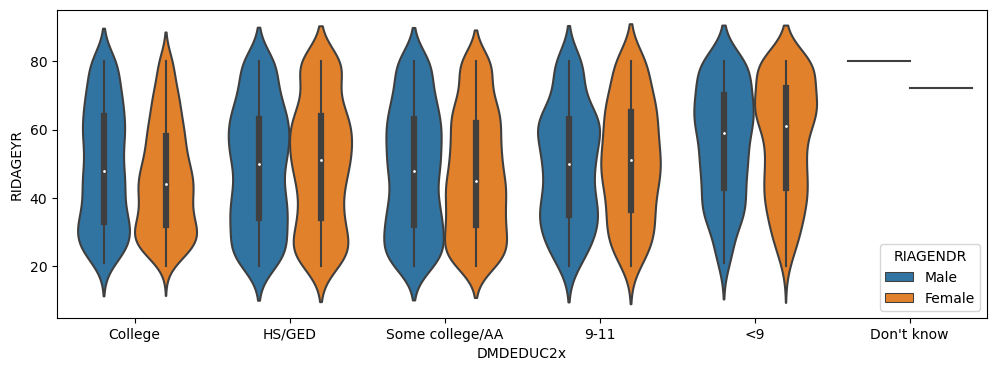

In [33]:
plt.figure(figsize=(12,4))
sns.violinplot(x='DMDEDUC2x', y='RIDAGEYR', hue='RIAGENDR',data=df);

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

*<span style="color:red">
The violin plot above shows that the age group for male and female with college degrees and 'Some College/AA' is right skewed whereas the age group for males and females with less than 9th grade education is left skewed. The data for 'HS/GED' and 9-11 grade is symmetric or equally distributed.
<span>*

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

In [38]:
ages = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
ages_series = pd.Series(ages)

In [40]:
age_bins = [0, 35, 50, 65]
age_categories = pd.cut(ages_series, bins=age_bins)

In [42]:
pd.DataFrame({'a':age_categories, 'b':ages})

,a,b
0,"(0, 35]",20
1,"(0, 35]",25
2,"(0, 35]",30
3,"(0, 35]",35
4,"(35, 50]",40
5,"(35, 50]",45
6,"(35, 50]",50
7,"(50, 65]",55
8,"(50, 65]",60
9,"(50, 65]",65


In [34]:
df.RIDAGEYR.describe()

count    5735.000000
mean       48.052310
std        18.431011
min        18.000000
25%        32.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

In [45]:
df['RIDAGEYR']

0       62
1       53
2       78
3       56
4       42
        ..
5730    76
5731    26
5732    80
5733    35
5734    24
Name: RIDAGEYR, Length: 5735, dtype: int64

In [43]:
age_bins = [18,30,40,50,60,70,80]
age_labels = ['18-30','31-40','41-50','51-60','61-70','71-80']
df['AGEGROUP'] = pd.cut(df['RIDAGEYR'], bins=age_bins, labels=age_labels)

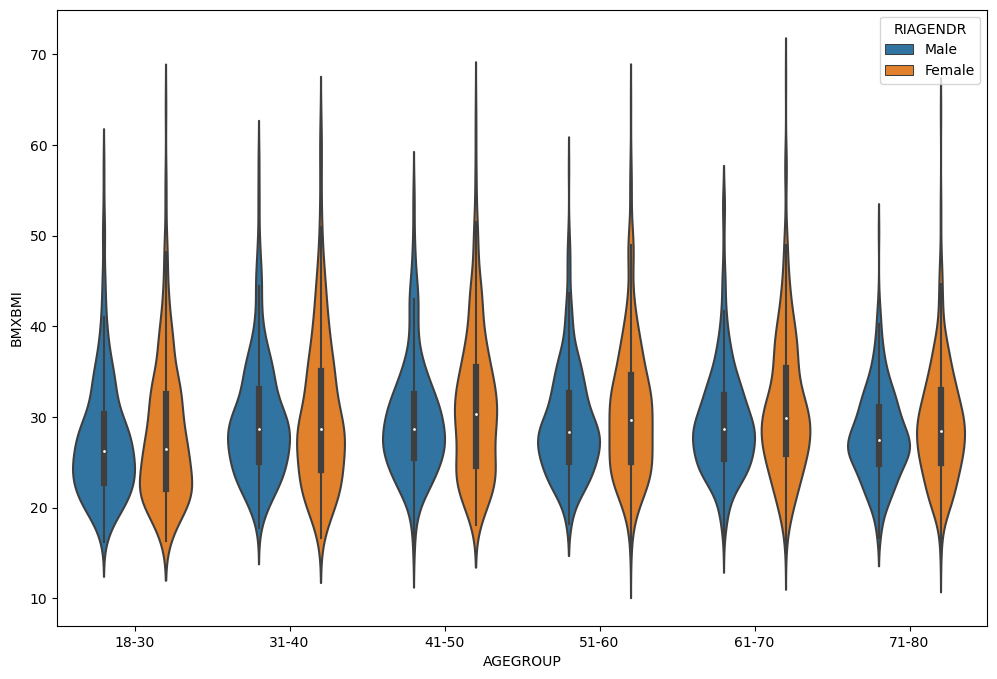

In [44]:
#plot
plt.figure(figsize=(12,8))
sns.violinplot(x='AGEGROUP', y='BMXBMI', hue='RIAGENDR', data=df);

__Q5a.__ Comment on the trends in BMI across the demographic groups.

*<span style="color:red">
The BMI is right skewed for females at the lowest age group. As we increase the age group, the BMI increases and becomes more symmetrical. The BMI for large amount of males is distributed close to the median.
</span>*


## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [46]:
# converting labels
df["RIDRETH1x"] = df.RIDRETH1.replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White", 
                                       4: "Non-Hispanic Black", 5: "Other Race - Including Multi-Racial"})
df["HIQ210x"] = df.HIQ210.replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't Know"})
df["HIQ210x"].fillna("Missing", inplace = True)

In [54]:
df.groupby('RIDRETH1x')['HIQ210x'].value_counts(normalize=True).unstack()

HIQ210x,Don't Know,Missing,No,Yes
RIDRETH1x,,,,
Mexican American,0.002947,0.337917,0.567780,0.091356
Non-Hispanic Black,0.000815,0.152404,0.754686,0.092095
Non-Hispanic White,0.001088,0.103861,0.834693,0.060359
Other Hispanic,NaN,0.233333,0.668000,0.098667
Other Race - Including Multi-Racial,0.002220,0.117647,0.807991,0.072142


In [65]:
pd.crosstab(index=df.RIDRETH1x,columns=df.HIQ210x, normalize='all')

HIQ210x,Don't Know,Missing,No,Yes
RIDRETH1x,,,,
Mexican American,0.000523,0.059983,0.100785,0.016216
Non-Hispanic Black,0.000174,0.032607,0.161465,0.019704
Non-Hispanic White,0.000349,0.033304,0.267655,0.019355
Other Hispanic,0.000000,0.030514,0.087358,0.012903
Other Race - Including Multi-Racial,0.000349,0.018483,0.126940,0.011334


In [67]:
pd.crosstab(index=df.RIDRETH1x,columns=df.HIQ210x, normalize='index')

HIQ210x,Don't Know,Missing,No,Yes
RIDRETH1x,,,,
Mexican American,0.002947,0.337917,0.567780,0.091356
Non-Hispanic Black,0.000815,0.152404,0.754686,0.092095
Non-Hispanic White,0.001088,0.103861,0.834693,0.060359
Other Hispanic,0.000000,0.233333,0.668000,0.098667
Other Race - Including Multi-Racial,0.002220,0.117647,0.807991,0.072142


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

*<span style="color:red">
Non-hispanic whites have the most proportion of NO's (0.83) when compared to other ethnic groups. Therefore Non-Hispanic whites had the highest rate of being uninsured in the last year.
<span>*